In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

100%|██████████| 26421880/26421880 [00:02<00:00, 12423413.68it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 194103.71it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3698421.66it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6139402.04it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [2]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [3]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [4]:
def train_loop(dataloader, model, loss_fn, optimizer):
    sum_loss = 0
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        sum_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * 64 + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [5]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct, test_loss

In [6]:
def run_training(epochs, train_dataloader, model, loss_fn, optimizer):
    test_loss = []
    train_loss = []
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        sum_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
        train_loss.append(sum_loss)

        acc, avg_loss = test_loop(test_dataloader, model, loss_fn)
        test_loss.append(avg_loss)

    return test_loss

In [7]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [8]:
test_loss_sgd = run_training(epochs, train_dataloader, model, loss_fn, optimizer)

Epoch 1
-------------------------------
loss: 2.306910  [   64/60000]
loss: 2.297593  [ 6464/60000]
loss: 2.275784  [12864/60000]
loss: 2.265566  [19264/60000]
loss: 2.257864  [25664/60000]
loss: 2.223825  [32064/60000]
loss: 2.236182  [38464/60000]
loss: 2.197757  [44864/60000]
loss: 2.195242  [51264/60000]
loss: 2.173867  [57664/60000]
Test Error: 
 Accuracy: 39.5%, Avg loss: 2.161103 

Epoch 2
-------------------------------
loss: 2.173340  [   64/60000]
loss: 2.171087  [ 6464/60000]
loss: 2.112148  [12864/60000]
loss: 2.126323  [19264/60000]
loss: 2.090681  [25664/60000]
loss: 2.016442  [32064/60000]
loss: 2.058275  [38464/60000]
loss: 1.971889  [44864/60000]
loss: 1.979751  [51264/60000]
loss: 1.926451  [57664/60000]
Test Error: 
 Accuracy: 50.0%, Avg loss: 1.910233 

Epoch 3
-------------------------------
loss: 1.940228  [   64/60000]
loss: 1.921228  [ 6464/60000]
loss: 1.801917  [12864/60000]
loss: 1.848551  [19264/60000]
loss: 1.750708  [25664/60000]
loss: 1.681548  [32064/600

In [9]:
print(test_loss_sgd)

[2.1611034414570804, 1.9102331749193229, 1.5486182111084081, 1.274494181013411, 1.1020758615177908]


In [10]:
model = NeuralNetwork()
optimizer = torch.optim.RMSprop(model.parameters(), lr = learning_rate, alpha = 0.9)
test_loss_rms = run_training(epochs, train_dataloader, model, loss_fn, optimizer)

Epoch 1
-------------------------------
loss: 2.310273  [   64/60000]
loss: 0.581411  [ 6464/60000]
loss: 0.465980  [12864/60000]
loss: 0.483853  [19264/60000]
loss: 0.450573  [25664/60000]
loss: 0.427725  [32064/60000]
loss: 0.405340  [38464/60000]
loss: 0.523739  [44864/60000]
loss: 0.579775  [51264/60000]
loss: 0.413585  [57664/60000]
Test Error: 
 Accuracy: 83.6%, Avg loss: 0.437348 

Epoch 2
-------------------------------
loss: 0.262855  [   64/60000]
loss: 0.330254  [ 6464/60000]
loss: 0.276635  [12864/60000]
loss: 0.371672  [19264/60000]
loss: 0.340422  [25664/60000]
loss: 0.393102  [32064/60000]
loss: 0.290280  [38464/60000]
loss: 0.434522  [44864/60000]
loss: 0.451180  [51264/60000]
loss: 0.377502  [57664/60000]
Test Error: 
 Accuracy: 84.9%, Avg loss: 0.423262 

Epoch 3
-------------------------------
loss: 0.225134  [   64/60000]
loss: 0.327732  [ 6464/60000]
loss: 0.203259  [12864/60000]
loss: 0.302699  [19264/60000]
loss: 0.326205  [25664/60000]
loss: 0.390940  [32064/600

In [11]:
test_loss_rms

[0.4373478620864783,
 0.4232622439124782,
 0.44520928601550447,
 0.4306632417022802,
 0.43954951406284504]

In [12]:
# Постройте графики зависимости сходимости (значение функции потерь от количества итераций работы алгоритма)
# от выбора оптимизационного метода
# количество эпох = 50
# Сравните, сделайте выводы
# https://pytorch.org/docs/stable/optim.htmld

In [13]:
def train_loop_home_version(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    sum_loss=0
    model.train()
    loss_on_graph = []
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        sum_loss += loss.item()
        loss_on_graph.append(loss.item())

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    return loss_on_graph

In [14]:
def run_training_home_version(epochs, train_dataloader, model, loss_fn, optimizer):
    test_loss = []
    train_loss=[]
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        sum_loss = train_loop_home_version(train_dataloader, model, loss_fn, optimizer)
        train_loss.append(sum_loss)

        acc, avg_loss = test_loop(test_dataloader, model, loss_fn)
        test_loss.append(avg_loss)
    return train_loss

In [15]:
epochs = 15

In [16]:
model_sgd = NeuralNetwork()
optimizer_sgd = torch.optim.SGD(model_sgd.parameters(), lr=learning_rate) # SGD
loss_sgd = run_training_home_version(epochs,
                            train_dataloader,
                            model_sgd,
                            loss_fn,
                            optimizer_sgd)


Epoch 1
-------------------------------
loss: 2.311202  [   64/60000]
loss: 2.298155  [ 6464/60000]
loss: 2.289516  [12864/60000]
loss: 2.285639  [19264/60000]
loss: 2.267364  [25664/60000]
loss: 2.245640  [32064/60000]
loss: 2.252137  [38464/60000]
loss: 2.222387  [44864/60000]
loss: 2.215213  [51264/60000]
loss: 2.193886  [57664/60000]
Test Error: 
 Accuracy: 35.2%, Avg loss: 2.188110 

Epoch 2
-------------------------------
loss: 2.194014  [   64/60000]
loss: 2.184359  [ 6464/60000]
loss: 2.141294  [12864/60000]
loss: 2.158926  [19264/60000]
loss: 2.117038  [25664/60000]
loss: 2.056902  [32064/60000]
loss: 2.089724  [38464/60000]
loss: 2.016792  [44864/60000]
loss: 2.023170  [51264/60000]
loss: 1.964677  [57664/60000]
Test Error: 
 Accuracy: 57.5%, Avg loss: 1.958623 

Epoch 3
-------------------------------
loss: 1.983149  [   64/60000]
loss: 1.954017  [ 6464/60000]
loss: 1.853544  [12864/60000]
loss: 1.898872  [19264/60000]
loss: 1.793977  [25664/60000]
loss: 1.729671  [32064/600

In [17]:
model_rms = NeuralNetwork()
optimizer_rms = torch.optim.RMSprop(model_rms.parameters(), lr=learning_rate, alpha=0.9) # RMS
loss_rms = run_training_home_version(epochs,
                            train_dataloader,
                            model_rms,
                            loss_fn,
                            optimizer_rms)

Epoch 1
-------------------------------
loss: 2.309806  [   64/60000]
loss: 0.553058  [ 6464/60000]
loss: 0.469483  [12864/60000]
loss: 0.479096  [19264/60000]
loss: 0.509041  [25664/60000]
loss: 0.463710  [32064/60000]
loss: 0.403066  [38464/60000]
loss: 0.529435  [44864/60000]
loss: 0.525577  [51264/60000]
loss: 0.447118  [57664/60000]
Test Error: 
 Accuracy: 82.9%, Avg loss: 0.464043 

Epoch 2
-------------------------------
loss: 0.279248  [   64/60000]
loss: 0.359909  [ 6464/60000]
loss: 0.299575  [12864/60000]
loss: 0.369861  [19264/60000]
loss: 0.352023  [25664/60000]
loss: 0.405136  [32064/60000]
loss: 0.302048  [38464/60000]
loss: 0.447878  [44864/60000]
loss: 0.399615  [51264/60000]
loss: 0.391259  [57664/60000]
Test Error: 
 Accuracy: 84.2%, Avg loss: 0.447949 

Epoch 3
-------------------------------
loss: 0.264585  [   64/60000]
loss: 0.364246  [ 6464/60000]
loss: 0.229786  [12864/60000]
loss: 0.313980  [19264/60000]
loss: 0.312876  [25664/60000]
loss: 0.383937  [32064/600

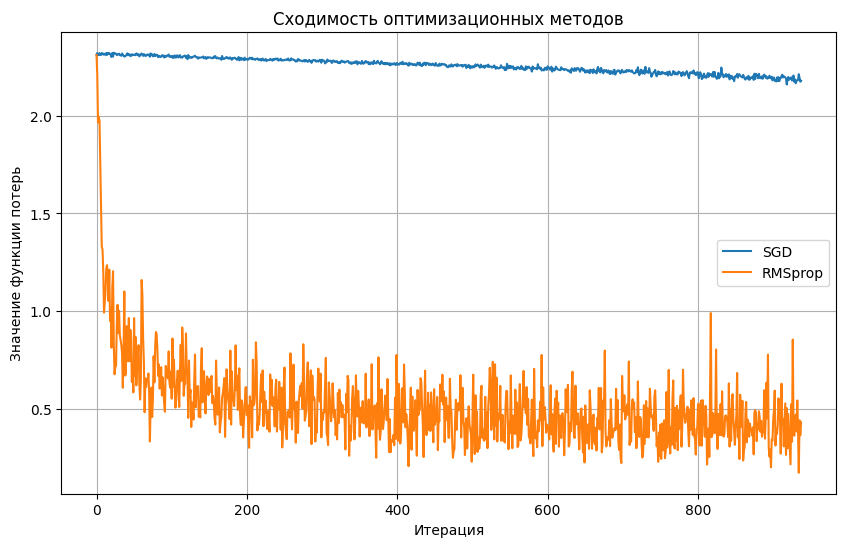

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(loss_sgd[0], label='SGD')
plt.plot(loss_rms[0], label='RMSprop')
plt.xlabel('Итерация')
plt.ylabel('Значение функции потерь')
plt.title('Сходимость оптимизационных методов')
plt.legend()
plt.grid(True)
plt.show()